In [1]:
import torch
import torchvision.transforms as transforms
import cv2
import numpy as np
import random
from PIL import Image
from denseNet import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from sklearn.metrics import classification_report


In [2]:
device = "cpu"
trs= [lambda x: cv2.resize(x,(32,32),interpolation= cv2.INTER_AREA ),lambda x : Image.fromarray(np.uint8(x)).convert('RGB'),transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]



In [3]:
data = np.load("data/dataset/output_data/np_data.npy",allow_pickle= True)
dataset = ObjectLoader(data,trs)

In [4]:
model_data = torch.load("data/dataset/output_data/densenet")
label_dict = model_data["labels"]
model = DenseNet(len(label_dict))
_ = model.eval()
model.load_state_dict(model_data["model_state"])
idx_label = {v: k for k, v in label_dict.items()}
print("Labels:\n",label_dict)


Labels:
 {'monster': 0, 'wallet': 1, 'wipes': 2, 'trapo': 3, 'control': 4}


In [5]:


y_true = [label_dict[elem] for elem in list(dataset.data[:250,1])]
y_pred_data = apply_transforms(trs,dataset.data[:250,0]).to(device)
y_pred =  torch.argmax(model.predict_proba(y_pred_data),dim =1).tolist()

target_names = list(label_dict)
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     monster       0.80      0.89      0.84         9
      wallet       0.97      0.83      0.89        41
       wipes       1.00      0.95      0.98        43
       trapo       1.00      0.92      0.96        66
     control       0.88      1.00      0.94        91

    accuracy                           0.94       250
   macro avg       0.93      0.92      0.92       250
weighted avg       0.95      0.94      0.94       250



In [6]:
#print(y_pred_data.shape)

trs= [
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
]


In [7]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

img,label = random.choice(data)
img2,label = random.choice(data)

print(img.shape)
blank = np.zeros((32,32,3))
img = apply_transforms(trs,[img,np.zeros((32,32,3))]).to(device)
#print(img)
model.to(device)
pred =model.forward(img)
other = model.predict_proba(img)
soft = torch.nn.Softmax(dim =1)
s = soft(pred)
print(other,s)

(16, 16, 3)


RuntimeError: The size of tensor a (32) must match the size of tensor b (16) at non-singleton dimension 2

trapo


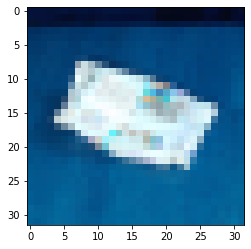

In [11]:
img = np.load("data/obj_log/roi.npy")
prev = img.copy()
img = apply_transforms(trs,[img,np.zeros((32,32,3))]).to(device)
arg = torch.argmax(model.predict_proba(img)[0]).item()
pred = idx_label[arg]
print(pred)
plt.imshow(prev)


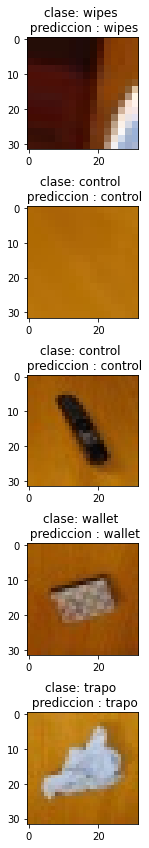

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
n_examples = 5
fig, axs = subplots(nrows=n_examples, figsize=(2,n_examples*3))
for i in range(n_examples):
    img,label = random.choice(dataset.data)
    prev = img.copy()
    img = apply_transforms(trs,[img]).to(device)
    arg = torch.argmax(model.predict_proba(img)[0]).item()
    pred = idx_label[arg]
    axs[i].imshow(prev)
    axs[i].set_title(f"clase: {label} \n prediccion : {pred}")
plt.show()